In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "mendel_peas.png")

In [2]:
exp_yellow=416/(416+140)*100
exp_yellow

74.82014388489209

In [4]:
exp_round=423/(423+133)*100
exp_round

76.07913669064749

##### Test statistic: Round

In [26]:
observed_statistic = abs ( 100 * (423 / 556) - 75)
observed_statistic

1.0791366906474877

In [37]:
sample_size = 556
mendel_proportions = make_array(0.75, 0.25) # From Mendel's law
mendel_proportion_round = mendel_proportions.item(0)

In [28]:
def one_simulated_distance():
    sample_proportion_round = sample_proportions(556, mendel_proportions).item(0)
    return 100 * abs(sample_proportion_round - mendel_proportion_round)

In [29]:
repetitions = 10000
distances = make_array()
for i in np.arange(repetitions):
    distances = np.append(distances, one_simulated_distance())

#### Null hypothesis is that Mendel's model explains observed data

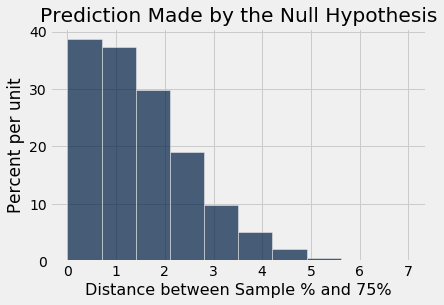

In [30]:
Table().with_column(
    'Distance between Sample % and 75%', distances
).hist()
plots.title('Prediction Made by the Null Hypothesis');

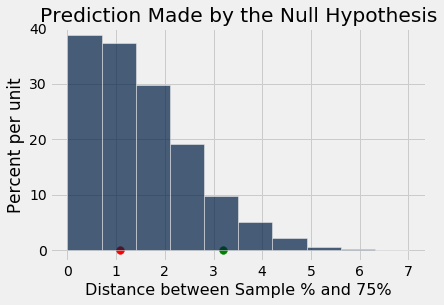

In [36]:
Table().with_column(
    'Distance between Sample % and 75%', distances
).hist()
plots.ylim(-0.02, 0.4)
plots.title('Prediction Made by the Null Hypothesis')
plots.scatter(observed_statistic, 0, color='red', s=60)
different_observed_statistic = 3.2
plots.scatter(different_observed_statistic, 0, color='green', s=60);

In [38]:
np.count_nonzero(distances >= observed_statistic) / repetitions

0.5263

In [39]:
np.count_nonzero(distances >= different_observed_statistic) / repetitions

0.086

### p value

If the p-value is less than 5%, it is considered small and the result is called “statistically significant.”

If the p-value is even smaller – less than 1% – the result is called “highly statistically significant.”

The null hypothesis is that the values match the Mendel model. A small p-value indicates an alternate hypothesis, reject null hypothesis